In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [3]:
DATA_PATH = "heart_failure_clinical_records_dataset.csv"
CLEAN_PATH = "heart_failure_clinical_records_dataset_cleaned.csv"

In [4]:
if not Path(DATA_PATH).is_file():
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Place the CSV in the notebook folder or update DATA_PATH.")


In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
print("=== Quick preview ===")
display(df.head(8))

=== Quick preview ===


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1


In [7]:
print("\n=== Shape ===")
print(df.shape)


=== Shape ===
(299, 13)


In [8]:
print("\n=== Data types ===")
print(df.dtypes)


=== Data types ===
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [9]:
print("\n=== Missing values (per column) ===")
print(df.isnull().sum())


=== Missing values (per column) ===
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [10]:
print("\n=== Duplicate rows ===")
print("duplicates:", df.duplicated().sum())


=== Duplicate rows ===
duplicates: 0


In [11]:
TARGET = "DEATH_EVENT"
if TARGET in df.columns:
    print("\n=== Target distribution ===")
    print(df[TARGET].value_counts(dropna=False))
    print("\nTarget distribution (proportions):")
    print(df[TARGET].value_counts(normalize=True))
else:
    print(f"\nWARNING: Target column '{TARGET}' not found. Please set TARGET variable correctly.")


=== Target distribution ===
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Target distribution (proportions):
DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64


In [12]:
print("\n=== Descriptive statistics (numeric cols) ===")
display(df.describe().T)


=== Descriptive statistics (numeric cols) ===


,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


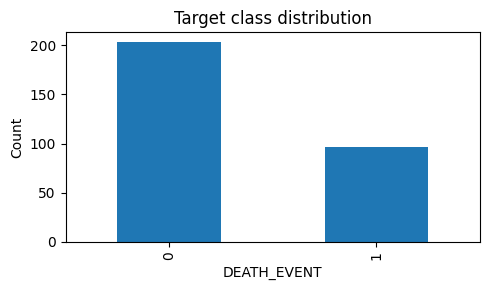

In [13]:
plt.figure(figsize=(5,3))
df[TARGET].value_counts().plot(kind='bar')
plt.title("Target class distribution")
plt.xlabel("DEATH_EVENT")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [14]:
## Cleaning Data Set 

df_clean = df.copy()

In [15]:
if df_clean.duplicated().sum() > 0:
    print(f"Dropping {df_clean.duplicated().sum()} duplicate rows.")
    df_clean = df_clean.drop_duplicates().reset_index(drop=True)
else:
    print("No duplicates to drop.")

No duplicates to drop.


In [16]:
## Impute numeric columns with median if any missing (this dataset typically has no missing)

num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if df_clean[c].isnull().any():
        med = df_clean[c].median()
        df_clean[c].fillna(med, inplace=True)
        print(f"Imputed numeric column {c} with median={med}")

In [17]:
# For categorical-like columns, fill missing with mode (if present)

cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()
for c in cat_cols:
    if df_clean[c].isnull().any():
        mode_val = df_clean[c].mode().iloc[0]
        df_clean[c].fillna(mode_val, inplace=True)
        print(f"Imputed categorical column {c} with mode='{mode_val}'")

In [18]:
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"\nCleaned dataset saved to: {CLEAN_PATH}")


Cleaned dataset saved to: heart_failure_clinical_records_dataset_cleaned.csv


In [19]:
print("\n=== Final shape and null checks ===")
print(df_clean.shape)
print(df_clean.isnull().sum().sum(), "total missing values (should be 0)")



=== Final shape and null checks ===
(299, 13)
0 total missing values (should be 0)


# **---- Classical SVM with Linear Kernel ----**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# Load dataset

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Features & target

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

In [22]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [23]:
# Standardize

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Predictions & metrics

y_pred = linear_svm.predict(X_test_scaled)
print("Classical SVM (Linear Kernel) Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classical SVM (Linear Kernel) Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



In [26]:
# Linear SVM

linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# ---- Quantum SVM with Angle Encoding (ZZFeatureMap) ----

In [43]:
from qiskit_aer import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [44]:
# Use same dataset (scaled)

X_scaled = MinMaxScaler().fit_transform(X)  # Scale to [0,1] for quantum circuits
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [45]:
# Reduce dimension to match available qubits (e.g., pick first 3 features)

X_train_q = X_train_q[:, :3]
X_test_q = X_test_q[:, :3]

In [46]:
# Create feature map

feature_map = ZZFeatureMap(feature_dimension=3, reps=3)

In [47]:
# Create quantum kernel using FidelityQuantumKernel

quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

In [48]:
# Create and train QSVC

qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train_q, y_train_q)

,quantum_kernel,<qiskit_machi...t 0x16874d950>
,C,1.0
,break_ties,False
,cache_size,200
,class_weight,None
,coef0,0.0
,decision_function_shape,'ovr'
,degree,3
,gamma,'scale'
,max_iter,-1
,probability,False


In [49]:
# Test the model

accuracy = qsvc.score(X_test_q, y_test_q)
print("QSVC (Basis Encoding) Accuracy:", accuracy)

QSVC (Basis Encoding) Accuracy: 0.6
